# Esse notebook contém a Seção 1 do curso Introduction to portfolio construction in python
Serão discutidos os fundamentos do risco e retorno.

Recall that the return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

If you come from R or another language that supports vectors, you might expect something like this to work:

```python
returns_a = prices_a[:-1]/prices_a[1:] - 1
```

However, since Python lists do not operate as vectors, that will not work, generating an error about "/" not working for lists.


In [2]:
# para fazer calculo de retorno com numpy, pegar um vetor sem contar o primeiro e dividir
# por outro vetor sem contar o último

import numpy as np

prices_a = np.array([8.70, 8.91, 8.71])
prices_a
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [3]:
import pandas as pd

In [4]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [5]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [8]:
# mas fazer isso com pandas não funciona

prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [10]:
 prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [14]:
prices.iloc[1:]/prices.iloc[:-1]

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


Isso acontece pq pandas alinha os df

In [17]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


Mas posso usar .values para usar só o valor das células (como se foses um np.array), sem contar a posição dela (que o pandas carrega).
Só preciso usar .values em um df, pq pandas só vai alinhá-los se os dois tiverem

In [19]:
# outro jeito é usar shift, que pula os números entre parentes, de forma cumulativa

prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [25]:
prices.shift(5)

,BLUE,ORANGE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [27]:
# pandas tem método de variação percentual
returns = prices.pct_change()

<AxesSubplot:>

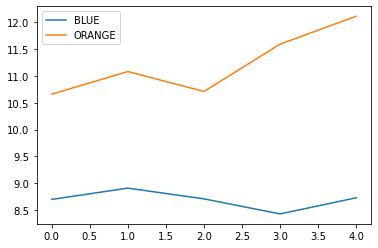

In [28]:
prices.plot()

<AxesSubplot:>

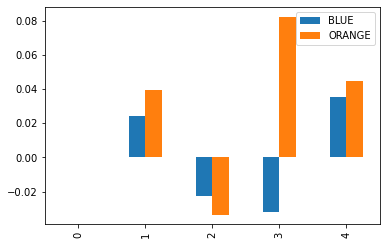

In [29]:
returns.plot.bar()

In [35]:
returns.std()

BLUE      0.033565
ORANGE    0.048328
dtype: float64

In [36]:
returns.mean()

BLUE      0.001283
ORANGE    0.033260
dtype: float64

In [38]:
# a função .prod do np faz produto da coluna

# se eu quiser saber qual foi o retorno de cada coluna no final:

np.prod(returns+1)-1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

In [40]:
# pandas também faz, usando método

(returns+1).prod()-1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

In [42]:
# pra deixar mais bonito, round arredonda
(((returns+1).prod()-1)*100).round(2)

BLUE       0.34
ORANGE    13.60
dtype: float64

# Risco

Voltatilidade = desvio padrão (raiz quadrada da variância)

Mas o desvio padrão vai estar ao dia, para anualizá-lo:
std_a = std_d*(252)^(-1/2)

sendo que o 252 só faz a conversão de dia para ano

# Trabalho: pegar alguns índices brasileiros (espertamente) e compará-los (graficamente) em termos de retorno e volatilidade (anualizados) 
Dica: Lo 30, Hi 30, Lo 20, Hi 20 são bons índices para comparar (Ken French's website)

Como comparar o retorno e volatilidade?

Pergunte: quanto eu tenho de retorno a cada unidade de risco? (return and risk ratio)
rrr = ret/ris

Entretanto, vale a pena ajustar pela taxa livre de risco

sharpe_ratio (P) = (ret_ativo - rf)/risco
sendo rf = US Treasure bonds
$$ Sharpe Ratio (P) = \frac{R_{p} - R_{f}}{stdev} $$


Dica: ao inves de usar len dos DF eu posso usar shape[0] 

In [116]:
# para ler csv de dados de ativos, interessante usar parâmetros pra transformar em data

returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, 
                     parse_dates=True, na_values=-99.99)

In [117]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [118]:
columns = ['Lo 10', 'Hi 10']
rets = returns[columns]
rets.columns = ['SmallCap','LargeCap']

In [257]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [120]:
# valores dos retornos está em porcentagem, vamos dividir por 100
rets = rets/100

In [285]:
returns

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


<AxesSubplot:>

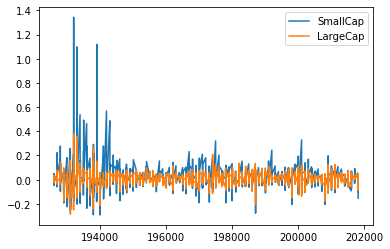

In [121]:
rets.plot.line()

In [67]:
# volatilidade anualizada (12 porque dados são mensais)
annual_vol = returns.std()*np.sqrt(12)

In [65]:
return_per_month = ((returns+1).prod())**(1/returns.shape[0])-1

In [66]:
return_per_month

Lo 10    0.012986
Hi 10    0.007423
dtype: float64

In [68]:
annual_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [69]:
annual_return = (return_per_month+1)**12 - 1

In [71]:
annual_return = ((returns+1).prod())**(12/returns.shape[0])-1

In [286]:
annual_return

Lo 10    0.167463
Hi 10    0.092810
dtype: float64

In [73]:
annual_return/annual_vol

Lo 10    0.454825
Hi 10    0.497063
dtype: float64

In [75]:
# deveria pegar a serie histórica de taxa de risco
risk_f = 0.03

In [76]:
# calculando sharpe

excess_return = annual_return-risk_f
sharpe = excess_return/annual_vol

In [78]:
sharpe

Lo 10    0.373346
Hi 10    0.336392
dtype: float64

Quando tava vendo sem tirar a taxa livre de risco, empresas de mais capital deram retorno maior para cada unidade de risco, mas usando sharpe temos que as menores empresas tiveram mais retorno por unidade de risco

# Max Drawdown

Pega a maior distância entre pico e vale das curvas de preço dos ativos

Pode ser usado como medida de risco

$$    Calmar Ratio = \frac{Return}{Max Drawdown}    $$


Desvantagens:
Só usa dois pontos -> sensível a outliers
Depende da frequência de observações

<AxesSubplot:>

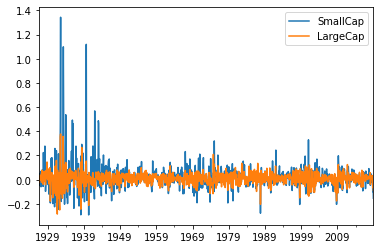

In [130]:
rets.plot.line()

In [129]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')

In [131]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [132]:
rets.index = rets.index.to_period('M')

In [135]:
rets["1996"]
#warning revisado na próxima linha

/tmp/ipykernel_16334/918591969.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1996"]


,SmallCap,LargeCap
1996-01,0.0518,0.0345
1996-02,0.0439,0.0100
1996-03,0.0349,0.0137
1996-04,0.0646,0.0129
1996-05,0.1032,0.0191
1996-06,-0.0288,0.0018
1996-07,-0.0894,-0.0445
1996-08,0.0329,0.0277
1996-09,0.0172,0.0590
1996-10,-0.0335,0.0229


In [230]:
# como levantou um warning, vamos tentar fazer como ele fala
rets.loc['1996']

,SmallCap,LargeCap
1996-01,0.0518,0.0345
1996-02,0.0439,0.0100
1996-03,0.0349,0.0137
1996-04,0.0646,0.0129
1996-05,0.1032,0.0191
1996-06,-0.0288,0.0018
1996-07,-0.0894,-0.0445
1996-08,0.0329,0.0277
1996-09,0.0172,0.0590
1996-10,-0.0335,0.0229


In [137]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdown

1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown -> wealth value as a percentage of the previous peak

In [158]:
# cumprod vai multiplicando a linha pela seguinte. A primeira linha não muda

wealth_index = 1000*(1+rets['LargeCap']).cumprod()

<AxesSubplot:>

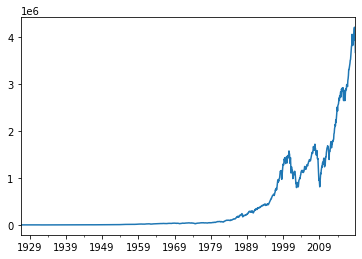

In [159]:
wealth_index.plot.line()

In [283]:
wealth_index.idxmin()

Period('1932-05', 'M')

In [160]:
# cummax maximo cumulativo
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

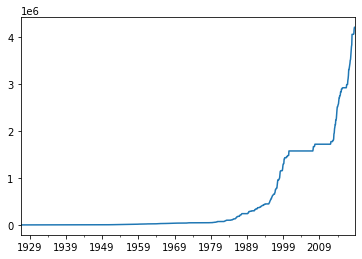

In [161]:
previous_peaks.plot()

In [164]:
draw_down = (wealth_index-previous_peaks)/previous_peaks

<AxesSubplot:>

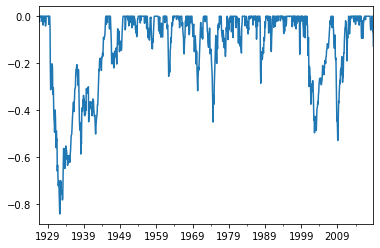

In [165]:
draw_down.plot()

Na crise de 1929, as pessoas perderam 80% da riqueza em ativos desse tipo 

In [228]:
# qual foi o maior drawdown desde 1975?
draw_down.loc['1975':].min()

-0.5280945042309304

In [229]:
# se eu quiser saber a data que ocorreu esse mínimo
draw_down.loc['1975':].idxmin()

Period('2009-02', 'M')

In [227]:
# Qual o índex do valor mínimo de todos os dados?
draw_down.idxmin()

Period('1932-05', 'M')

In [245]:
# Função que calcula drawdown

def drawdown(rets: pd.Series):
    """
    Pega um série temporal de retornos de um ativo
    Computa e retorna um DataFrame com:
    wealth index - preço de um ativo buy & hold
    previous peaks - picos maiores picos atingidos ao longo dos anos
    percent drawdown - porcentagens de queda em relação aos previous peaks
    
    """
    
    wealth = 1000*((1+rets).cumprod())
    peak = wealth.cummax()
    drawdown = (wealth-peak)/peak
    return(pd.DataFrame({
        'Wealth': wealth,
        'Peaks' : peak,
        'Drawdown': drawdown
    }))

In [279]:
vini = drawdown(rets['LargeCap'])

In [280]:
a = vini["Wealth"].loc['1932'].min()

In [281]:
b = vini["Wealth"].loc['1932'].max()

In [282]:
(a-b)/b

-0.468975879424

<AxesSubplot:>

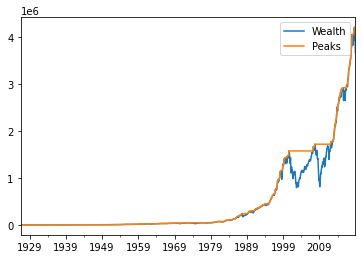

In [247]:
# Plota wealth e peaks para LargeCaps
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot()

<AxesSubplot:>

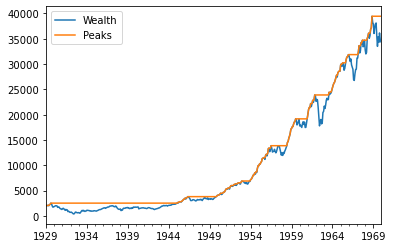

In [251]:
# Plota wealth e peaks para período entre 1929 e 1969
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].loc['1929':'1969'].plot()

In [253]:
drawdown(rets['LargeCap'])['Drawdown'].min()

-0.8400375277943123

In [254]:
drawdown(rets['SmallCap'])['Drawdown'].min()

-0.8330007793945303

In [255]:
drawdown(rets['LargeCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [256]:
drawdown(rets['SmallCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

Comparando o Small e Large Cap, vemos que a data do maior drawdown foi em maio de 1932